In [1]:
#!pip install import_ipynb

In [2]:
import warnings
warnings.filterwarnings('ignore')

# import import_ipynb
# from Preprocessing_05 import X_train_lowcorr, X_test_lowcorr, Y_train, Y_test, data, X, df_labels

#import error 뜬다면 런타임 다시 실행시키고 !pip uninstall scipy, !pip install scipy==1.1.0 한 후 이 코드 실행시키기

In [3]:
import math
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score

In [4]:
df = pd.read_csv('preprocessed(MinMax).csv')
df

,age,campaign,day,previous,0,1,2,4,6,8,...,12,14,16,job_0,job_1,job_2,job_3,month_1,month_3,y
0,0.337662,0.000000,0.800000,0.000000,-0.313533,1.394495,0.000000,1.0,0.0,0.0,...,0.0,0.0,0.0,0,1,0,0,0,0,0
1,0.311688,0.081633,0.500000,0.000000,-0.215817,0.633028,0.000000,1.0,0.0,0.0,...,0.0,0.0,0.0,0,0,1,1,0,1,0
2,0.480519,0.020408,0.333333,0.000000,-0.219332,0.206422,0.000000,1.0,0.0,1.0,...,0.0,0.0,0.0,0,0,0,1,0,0,0
3,0.246753,0.061224,0.733333,0.000000,0.075923,0.100917,0.000000,1.0,0.0,0.0,...,1.0,1.0,0.0,0,1,0,1,0,1,0
4,0.207792,0.000000,0.266667,0.003636,-0.024605,0.417431,29.454545,1.0,0.0,0.0,...,1.0,1.0,0.0,0,1,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30902,0.714286,0.000000,0.533333,0.029091,1.671002,0.545872,3.727273,1.0,0.0,0.0,...,0.0,0.0,0.0,1,0,0,1,1,0,1
30903,0.090909,0.020408,0.533333,0.000000,0.022496,0.940367,0.000000,0.0,0.0,0.0,...,0.0,1.0,0.0,0,0,1,1,1,0,1
30904,0.428571,0.040816,0.533333,0.000000,0.247452,3.651376,0.000000,1.0,0.0,1.0,...,0.0,0.0,0.0,0,0,1,1,1,0,1
30905,0.688312,0.020408,0.533333,0.000000,0.882953,1.261468,0.000000,0.0,1.0,0.0,...,0.0,0.0,0.0,1,0,0,1,1,0,1


In [5]:
# 정상/이상 구분
normal = df.loc[df['y'] == 0]
anomaly = df.loc[df['y'] == 1]

# 행 shuffle 후 위에서 4513개 --> test
normal_shuffled=normal.sample(frac=1, random_state=3).reset_index(drop=True) #shuffling
normal_shuffled_test = normal_shuffled[:4513]
normal_shuffled_train = normal_shuffled[4513:]

# train에 쓰이는 정상 데이터 X, Y 구분
X_train = normal_shuffled_train[normal_shuffled_train.columns.difference(['y'])]
Y_train = normal_shuffled_train["y"]

# test에 쓰이는 정상 데이터 X, Y 구분 (샘플링)
X_normal_shuffled_test = normal_shuffled_test[normal_shuffled_test.columns.difference(['y'])]
Y_normal_shuffled_test = normal_shuffled_test["y"]

# test에 쓰이는 이상 데이터 X, Y 구분
X_anomaly = anomaly[anomaly.columns.difference(['y'])]
y_anomaly = anomaly["y"]

X_test = pd.concat([X_normal_shuffled_test, X_anomaly])
Y_test = pd.concat([Y_normal_shuffled_test, y_anomaly])

X_train.columns

Index(['0', '1', '10', '12', '14', '16', '2', '4', '6', '8', 'age', 'campaign',
       'day', 'job_0', 'job_1', 'job_2', 'job_3', 'month_1', 'month_3',
       'previous'],
      dtype='object')

In [6]:
trainset = pd.concat([X_train,Y_train],axis = 1)
testset = pd.concat([X_test,Y_test],axis = 1)
X_pr = pd.concat([X_train, X_test],axis=0)
dataset = pd.concat([trainset,testset],axis = 0)

Normal = dataset.loc[dataset['y'] == 0]
Anomaly = dataset.loc[dataset['y'] == 1]

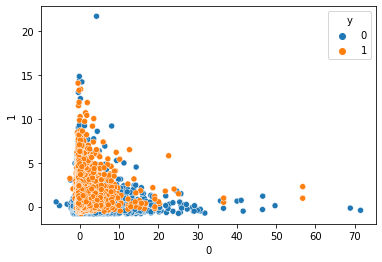

In [7]:
# 데이터 시각화 
plt.figure(figsize=(6, 4))
sns.scatterplot(dataset.iloc[:,0], dataset.iloc[:,1], hue=dataset['y'])

# LOF

In [8]:
from sklearn.neighbors import LocalOutlierFactor

LocalOutlierFactor
- n_neighbors: neighbors 개수. 디폴트 20
- algorithm: nearest neighbors 계산 방법 ('auto', 'ball_tree', 'kd_tree', 'brute'}. 디폴트 'auto'
- metric: distance 계산 방법. 디폴트 'minkowski'
- novelty: True (for novelty detection - no oulier in train data), False (for outlier detection - ouliers in train data). 디폴트 False

In [9]:
# LOF 모델 적합
lof_model = LocalOutlierFactor(n_neighbors=15, novelty=True)
lof_model.fit(X_train)

LocalOutlierFactor(n_neighbors=15, novelty=True)

## 추정된 분포로 train & test 데이터 novelty score 생성

In [10]:
lof_train = - 1.0 * lof_model.score_samples(X_train) #이것으로 log likelihood 뽑아낼 수 있음. 크면 클수록 이상치로 정의해서 마이너스 붙임 그래서 negative log likelihood
lof_test = - 1.0 * lof_model.score_samples(X_test)

In [11]:
lof_train

array([0.98977711, 0.98182414, 1.04905501, ..., 1.03964204, 0.99491323,
       1.00697431])

### train/test 데이터의 novelty score 분포 시각화

Text(0.5, 1.0, 'Test Data')

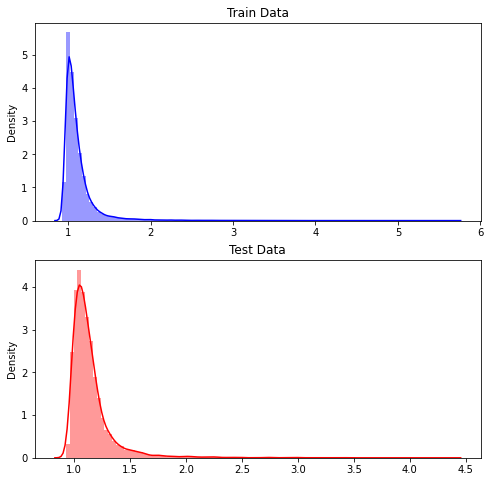

In [12]:
fig, (ax1, ax2) = plt.subplots(nrows=2, ncols=1, figsize = (8, 8)) #2행 1열

sns.distplot(lof_train, bins=100, color='blue', ax=ax1) #negative log likelihood
# bin=100 : x 계급 구간을 100개로 counting 하겠다.
sns.distplot(lof_test, bins=100, color='red', ax=ax2)
ax1.set_title("Train Data")
ax2.set_title("Test Data")

## threshold

### best f1 score 방식

In [13]:
# score의 min ~ max 범위를 num_step개로 균등 분할한 threshold에 대하여 best threshold 탐색 
def search_best_threshold(score, y_true, num_step):
    best_f1 = 0.5
    best_threshold = None
    for threshold in np.linspace(min(score), max(score), num_step): #min~max사이에 num_step여개 생성
        y_pred = threshold < score # true 값일 거고 threshold > score 이면 false

        f1 = f1_score(y_true, y_pred)
        if f1 > best_f1:
            best_f1 = f1
            best_threshold = threshold

    print('Best threshold: ', round(best_threshold, 4))
    print('Best F1 Score:', round(best_f1, 4))
    return best_threshold

In [ ]:
# best threshold 도출
lof_best_threshold = search_best_threshold(lof_test, Y_test, num_step=1000)

KeyboardInterrupt: ignored

### best threshold 기반 모델 평가

In [24]:
for i in range(1,9):
    lof_best_threshold = (10+i)/10
    lof_scores = pd.DataFrame()
    lof_scores['score'] = list(np.hstack([lof_train, lof_test]))
    lof_scores['anomaly'] = lof_best_threshold < lof_scores['score'] #true 값일 거고 threshold > score 이면 false
    lof_scores['anomaly'] = lof_scores['anomaly'].replace({True: 1, False: 0})
    print(len(lof_scores.loc[lof_scores['anomaly'] == 1]))

12380
5654
3067
1937
1356
966
728
565


In [42]:
lof_best_threshold = 1.23
lof_scores = pd.DataFrame()
lof_scores['score'] = list(np.hstack([lof_train, lof_test]))
lof_scores['anomaly'] = lof_best_threshold < lof_scores['score'] #true 값일 거고 threshold > score 이면 false
lof_scores['anomaly'] = lof_scores['anomaly'].replace({True: 1, False: 0})
print(len(lof_scores.loc[lof_scores['anomaly'] == 1]))

4602


In [43]:
4602/30907

0.14889830782670593

In [ ]:
lof_scores.loc[lof_scores['anomaly'] == 0]

### FRR, FAR, F1 score 도출

In [44]:
def calculate_metric(y_true, y_pred):
    cm = confusion_matrix(y_true, y_pred, labels=[1, 0])
    tp, fn, fp, tn = cm.ravel()
    
    frr = fp / (fp + tn)
    far = fn / (fn + tp) 
    
    f1 = f1_score(y_true, y_pred)

    sns.heatmap(pd.DataFrame(cm, columns = ['Predicted', 'Actual']),
            xticklabels=['Abnormal [1]', 'Normal [0]'], 
            yticklabels=['Abnormal [1]', 'Normal [0]'], 
            annot=True, fmt="d", linewidths=.5, cmap="YlGnBu")
    plt.ylabel('Actual')
    plt.xlabel('Predicted')
    
    return frr, far, f1

**  FRR: 0.1757  |  FAR: 0.8269  |  F1 Score: 0.2566


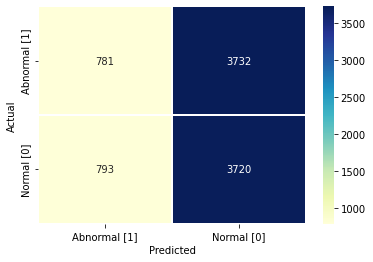

In [45]:
# test 평가
frr, far, f1 = calculate_metric(Y_test, lof_scores['anomaly'].iloc[len(lof_train):])

print("**  FRR: {}  |  FAR: {}  |  F1 Score: {}".format(round(frr, 4), round(far, 4), round(f1, 4)))

k =3, 5, 7 일 때 FAR은 괜찮지만 FRR이 높다.

In [ ]:
# train 평가
frr, far, f1 = calculate_metric(Y_train, lof_scores['anomaly'].iloc[:len(lof_train)])

print("**  FRR: {}  |  FAR: {}  |  F1 Score: {}".format(round(frr, 4), round(far, 4), round(f1, 4)))

k =5, 7 일 때 train도 반 밖에 못 맞춘다.

k =3 일 때 train 반도 못 맞춘다.

## 적합시킨 모델 계속해서 예측하기

In [ ]:
# train data에 대한 예측 값(정상=1, 이상=-1)
lof_train_pred = pd.DataFrame(lof_model.predict(X_train))
lof_train_pred = lof_train_pred.replace({-1: 1, 1: 0})
lof_train_pred

,0
0,0
1,0
2,0
3,0
4,0
...,...
21876,0
21877,0
21878,0
21879,0


In [ ]:
lof_train_pred[0].value_counts()

0    20954
1      927
Name: 0, dtype: int64

In [ ]:
# 이상 비율
len(lof_train_pred[lof_train_pred[0] == 1])/21881

0.042365522599515565

In [ ]:
# test data에 대한 예측 값(정상=1, 이상=-1) ->(정상=0, 이상=1)
lof_test_pred = pd.DataFrame(lof_model.predict(X_test))
lof_test_pred = lof_test_pred.replace({-1: 1, 1: 0})
lof_test_pred

,0
0,0
1,0
2,0
3,0
4,0
...,...
9021,0
9022,0
9023,0
9024,0


In [ ]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score

**  FRR: 0.0567  |  FAR: 0.9617  |  F1 Score: 0.07


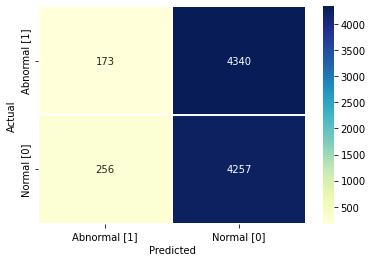

In [ ]:
# test 평가
frr, far, f1 = calculate_metric(Y_test, lof_test_pred)

print("**  FRR: {}  |  FAR: {}  |  F1 Score: {}".format(round(frr, 4), round(far, 4), round(f1, 4)))

### threshold 변경

# KernelDensity

In [ ]:
from sklearn.neighbors import KernelDensity

KernelDensity
  - kernel: 사용할 커널 종류 ('gaussian', 'tophat', 'epanechnikov', 'exponential', 'linear', 'cosine'). 디폴트 'gaussian'

## train 데이터 분포 추정

In [ ]:
kde_model = KernelDensity(kernel='gaussian', bandwidth=0.2) # 여기서 gaussian은 분포를 가정하는 게 아니라 커널 계산 종류로 지정
kde_model.fit(X_train)

KernelDensity(bandwidth=0.2)

## 추정된 분포로 train & test 데이터 novelty score 생성

In [ ]:
# train/test 데이터의 -logpdf 도출 # 2분 걸림
kde_train = - 1.0 * kde_model.score_samples(X_train)
kde_test = - 1.0 * kde_model.score_samples(X_test)

### train/test 데이터의 novelty score 분포 시각화

Text(0.5, 1.0, 'Test Data')

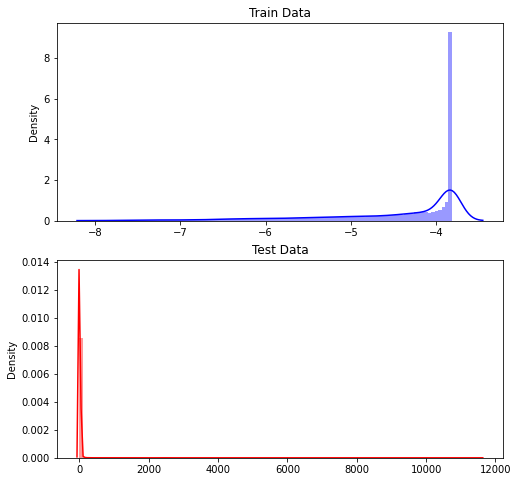

In [ ]:
fig, (ax1, ax2) = plt.subplots(nrows=2, ncols=1, figsize = (8, 8)) #2행 1열

sns.distplot(kde_train, bins=100, color='blue', ax=ax1) #negative log likelihood
# bin=100 : x 계급 구간을 100개로 counting 하겠다.
sns.distplot(kde_test, bins=100, color='red', ax=ax2)
ax1.set_title("Train Data")
ax2.set_title("Test Data")

## threshold

### best f1 score 방식

In [ ]:
# best threshold 도출
kde_best_threshold = search_best_threshold(kde_test, Y_test, num_step=1000)

Best threshold:  -7.7915
Best F1 Score: 0.6667


### best threshold 기반 모델 평가

In [ ]:
kde_scores = pd.DataFrame()
kde_scores['score'] = list(np.hstack([kde_train, kde_test]))
kde_scores['anomaly'] = kde_best_threshold < kde_scores['score'] #true 값일 거고 threshold > score 이면 false
kde_scores['anomaly'] = kde_scores['anomaly'].replace({True: 1, False: 0})
kde_scores

,score,anomaly
0,-6.571840,1
1,-4.706991,1
2,-4.477861,1
3,-5.280355,1
4,-4.148301,1
...,...,...
30902,16.630748,1
30903,0.092310,1
30904,2.566003,1
30905,10.554746,1


### FRR, FAR, F1 score 도출

**  FRR: 0.9998  |  FAR: 0.0  |  F1 Score: 0.6667


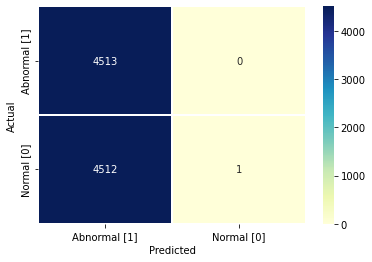

In [ ]:
# test 평가
frr, far, f1 = calculate_metric(Y_test, kde_scores['anomaly'].iloc[len(kde_train):])

print("**  FRR: {}  |  FAR: {}  |  F1 Score: {}".format(round(frr, 4), round(far, 4), round(f1, 4)))

'정상' 모두를 '이상'이라고 한다!!

### threshold 변경

#### 실제 이상 개수(4513)와 비율 맞춰서 threshold 잡기

In [ ]:
for i in range(0,20):
    kde_best_threshold = i
    kde_scores2 = pd.DataFrame()
    kde_scores2['score'] = list(np.hstack([kde_train, kde_test]))
    kde_scores2['anomaly'] = kde_best_threshold < kde_scores2['score'] #true 값일 거고 threshold > score 이면 false
    kde_scores2['anomaly'] = kde_scores2['anomaly'].replace({True: 1, False: 0})

    print(len(kde_scores2.loc[kde_scores2['anomaly'] == 1]))

4684
4415
4182
3976
3806
3648
3515
3400
3257
3040
2758
2526
2307
2140
2001
1864
1773
1667
1587
1524


In [ ]:
1524+29383

30907

In [ ]:
kde_best_threshold = 0

In [ ]:
kde_scores2 = pd.DataFrame()
kde_scores2['score'] = list(np.hstack([kde_train, kde_test]))
kde_scores2['anomaly'] = kde_best_threshold < kde_scores2['score'] #true 값일 거고 threshold > score 이면 false
kde_scores2['anomaly'] = kde_scores2['anomaly'].replace({True: 1, False: 0})

In [ ]:
len(kde_scores2.loc[kde_scores2['anomaly'] == 0])

26223

In [ ]:
len(kde_scores2.loc[kde_scores2['anomaly'] == 1])

4684

In [ ]:
4684/30907

0.15155142847898534

**  FRR: 0.0682  |  FAR: 0.7456  |  F1 Score: 0.3847


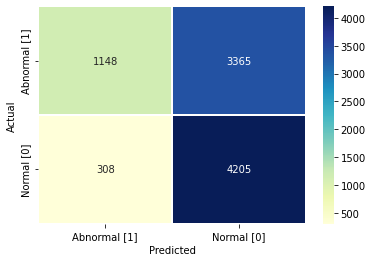

In [ ]:
# test 평가
frr, far, f1 = calculate_metric(Y_test, kde_scores['anomaly'].iloc[len(kde_train):])

print("**  FRR: {}  |  FAR: {}  |  F1 Score: {}".format(round(frr, 4), round(far, 4), round(f1, 4)))